In [0]:
import numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils

import matplotlib.pyplot as plt
import random

In [0]:
from keras.datasets import cifar10


In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
Y_test = y_test

In [0]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
def resolve_class_label(index):
  return class_labels[max(0, min(len(class_labels), index))]


In [0]:
def create_model(optimizer, num_classes, verbose):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())

  model.add(Conv2D(128, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())

  model.add(Flatten())
  model.add(Dropout(0.2))

  model.add(Dense(256, kernel_constraint=maxnorm(3)))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(Dense(128, kernel_constraint=maxnorm(3)))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  if verbose:
    print(model.summary())
  return model

In [0]:
model = create_model('adam', 10 ,True)
epochs=10
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=1024)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 64)       

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 76.54%


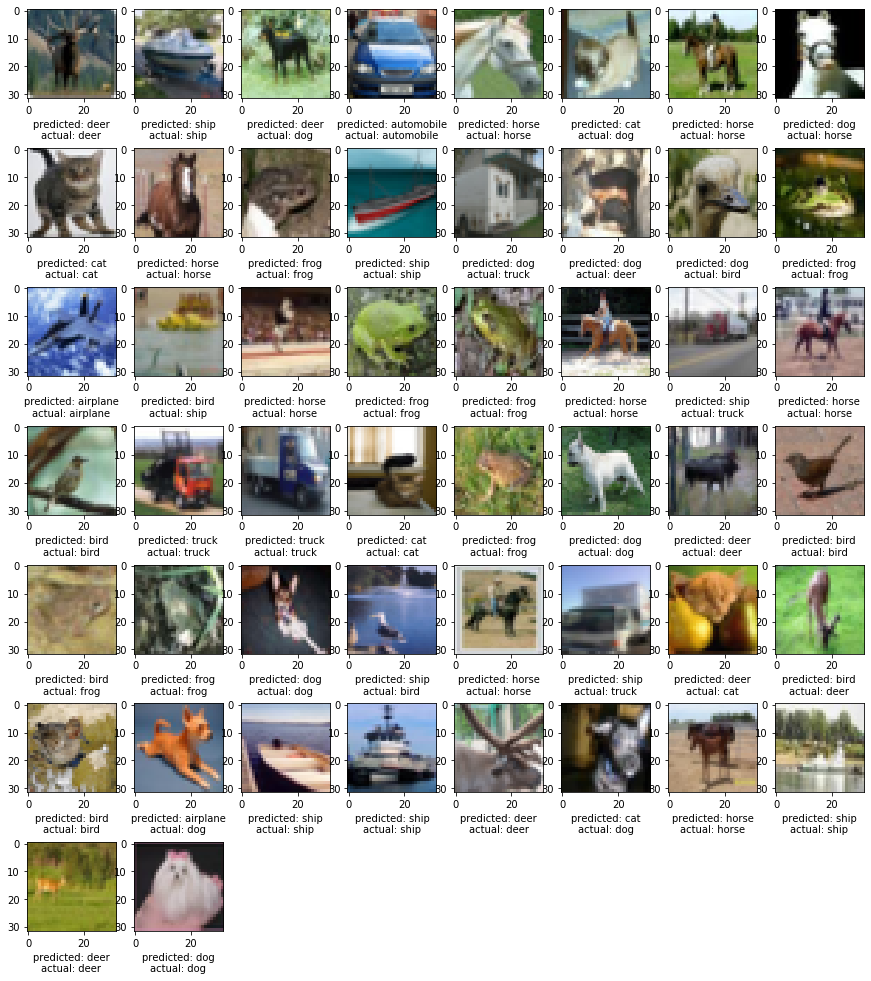

In [0]:
num_samples = 50
random_test_samples = random.sample(range(0, len(X_test)), num_samples)


figure = plt.figure(figsize=(15, 20))
figure_side = int(num_samples ** 0.5 + 1)

from sklearn.metrics import confusion_matrix
y_true = []
y_pred = []
for i in range(0, len(random_test_samples)):
  # querying data
  sample_index = random_test_samples[i]
  true_label = Y_test[sample_index][0]
  y_true.append(true_label)
  image = X_test[sample_index]
  predicted_label = model.predict(image.reshape(1, 32, 32, 3)).argmax()
  y_pred.add(predicted_label)

  #plotting
  plot_index = i + 1
  figure.add_subplot(figure_side, figure_side, plot_index)
  plt.imshow(image)
  plt.xlabel("predicted: " + resolve_class_label(predicted_label) + "\n" + "actual: " + resolve_class_label(true_label))

